In [25]:
## User Engagement Analysis

In [26]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans

#
import pickle

#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
import matplotlib.pyplot as plt
from IPython.display import Image
from plotly.subplots import make_subplots
# 
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [27]:
df = pd.read_csv('../data/cleaned_telecom_data_source.csv', index_col=0)

In [28]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 61 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Email (Bytes),Other (Bytes),Social Media (MB),Google (MB),Youtube (MB),Netflix (MB),Gaming (MB),Email (MB),Other (MB),Total Data (MB)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,3701304.0,180558843.0,1.570185,2.905912,18.355943,17.855187,292.426453,3.701304,180.558843,345.629377


### In the current dataset we are expected to track the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))


In [29]:
# aggregate the above listed columns
user_engagement_df = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total Data (Bytes)']].copy().rename(columns={
    'Bearer Id': 'Session Frequency', 'MSISDN/Number':'User Id', 'Dur. (ms)': 'Duration', 'Total Data (Bytes)': 'Total Data Usage'})

In [30]:
# aggregate the engagement metrics per user
user_engagement = user_engagement_df.groupby('User Id').agg({'Session Frequency': 'count', 'Duration': 'sum', 'Total Data Usage': 'sum'})
user_engagement.head(10)

,Session Frequency,Duration,Total Data Usage
User Id,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09
3.360101e+10,2,253983.0,6.152172e+08
3.360101e+10,2,128360.0,6.547231e+08
3.360101e+10,1,86399.0,3.326604e+08
3.360101e+10,2,495702.0,9.901322e+08


In [31]:
# display top 10 session frequency per user
sessions = user_engagement.nlargest(10, "Session Frequency")['Session Frequency']

In [32]:
# display top 10 session duration per user
duration = user_engagement.nlargest(10, "Duration")['Duration']

In [33]:
# display top 10 total data usage per user
total_data_usage = user_engagement.nlargest(10, "Total Data Usage")['Total Data Usage']

In [34]:
# make use of the data_plots file( utitlity functions)
from data_plots import plot_hist,plot_heatmap,plot_mult_hist,plot_bar,plot_bar_columns

# plot_heatmap(user_engagement,'Heat Map')

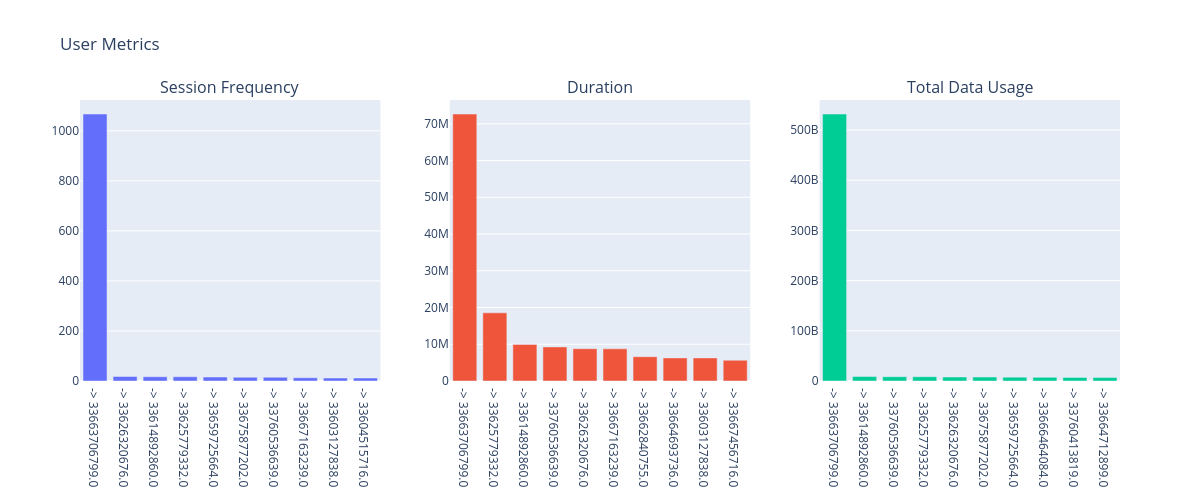

In [35]:
# display top 10 session frequency per user
plot_mult_hist([sessions, duration, total_data_usage], 1, 3,
                                   "User Metrics", ['Session Frequency', 'Duration', 'Total Data Usage'])

In [36]:
# k-means ML algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(user_engagement)

In [37]:
# add new column(Cluster) into our dataframe
user_engagement.insert(0, 'Cluster', kmeans.labels_)

In [38]:
# 
user_engagement['Cluster'].value_counts()

0    90825
2    16030
1        1
Name: Cluster, dtype: int64

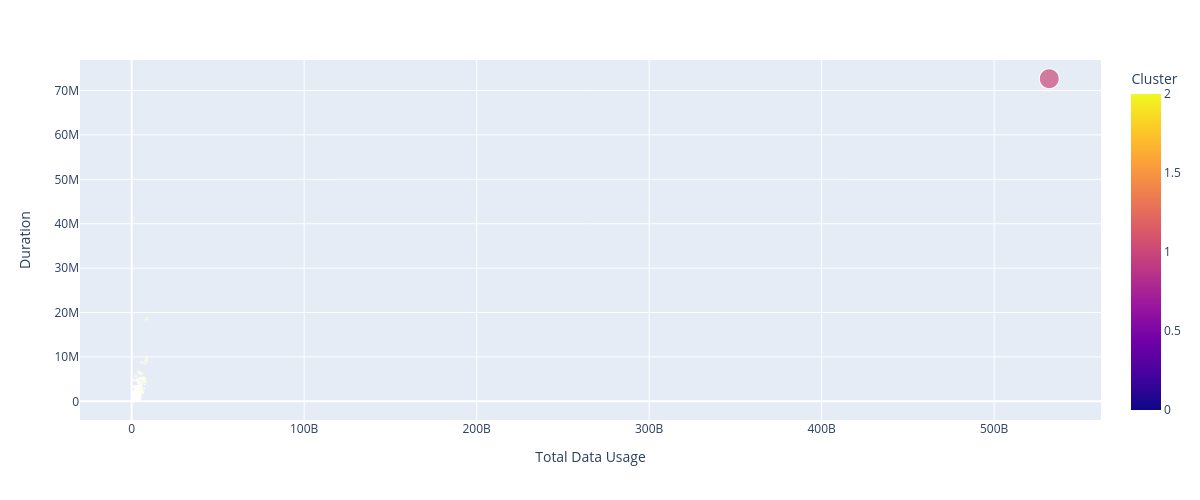

In [39]:
# 
fig = px.scatter(user_engagement, x='Total Data Usage', y="Duration", color='Cluster', size='Session Frequency')
Image(pio.to_image(fig, format='png', width=1200))

In [40]:
# 
cluster1 = user_engagement[user_engagement["Cluster"]==0]
cluster1.describe()

,Cluster,Session Frequency,Duration,Total Data Usage
count,90825.0,90825.000000,9.082500e+04,9.082500e+04
mean,0.0,1.153647,1.170590e+05,5.338852e+08
std,0.0,0.387771,9.152274e+04,2.561812e+08
min,0.0,1.000000,7.142000e+03,3.324901e+07
25%,0.0,1.000000,6.069100e+04,3.165935e+08
50%,0.0,1.000000,9.187800e+04,5.424654e+08
75%,0.0,1.000000,1.550630e+05,7.515438e+08
max,0.0,4.000000,3.174824e+06,1.055771e+09


In [41]:
# 
cluster1 = user_engagement[user_engagement["Cluster"]==1]
cluster1.describe()

,Cluster,Session Frequency,Duration,Total Data Usage
count,1.0,1.0,1.0,1.000000e+00
mean,1.0,1067.0,72655568.0,5.319636e+11
std,NaN,NaN,NaN,NaN
min,1.0,1067.0,72655568.0,5.319636e+11
25%,1.0,1067.0,72655568.0,5.319636e+11
50%,1.0,1067.0,72655568.0,5.319636e+11
75%,1.0,1067.0,72655568.0,5.319636e+11
max,1.0,1067.0,72655568.0,5.319636e+11


In [42]:
# 
cluster1 = user_engagement[user_engagement["Cluster"]==2]
cluster1.describe()

,Cluster,Session Frequency,Duration,Total Data Usage
count,16030.0,16030.000000,1.603000e+04,1.603000e+04
mean,2.0,2.754460,3.110938e+05,1.580980e+09
std,0.0,1.140445,3.899402e+05,5.510252e+08
min,2.0,2.000000,1.823500e+04,1.055942e+09
25%,2.0,2.000000,1.624950e+05,1.217108e+09
50%,2.0,2.000000,2.472350e+05,1.421893e+09
75%,2.0,3.000000,3.540700e+05,1.730165e+09
max,2.0,18.000000,1.855375e+07,8.846226e+09


In [43]:
# aggregate each applicaton's data
app_df = df.groupby('MSISDN/Number').agg({'Gaming (Bytes)': 'sum', 'Youtube (Bytes)': 'sum', 'Netflix (Bytes)': 'sum',\
                     'Google (Bytes)': 'sum', 'Email (Bytes)': 'sum', 'Social Media (Bytes)': 'sum', 'Other (Bytes)': 'sum'})
app_df.head()

,Gaming (Bytes),Youtube (Bytes),Netflix (Bytes),Google (Bytes),Email (Bytes),Social Media (Bytes),Other (Bytes)
MSISDN/Number,,,,,,,
3.360100e+10,8.124587e+08,21624548.0,27180981.0,4389005.0,1331362.0,2232135.0,386570872.0
3.360100e+10,1.197501e+08,12432223.0,11221763.0,5334863.0,3307781.0,2660565.0,281710071.0
3.360100e+10,5.388277e+08,21333570.0,19353900.0,3443126.0,3205380.0,3195623.0,501693672.0
3.360101e+10,3.911261e+08,6977321.0,1942092.0,9678493.0,2284670.0,280294.0,35279702.0
3.360101e+10,1.314798e+09,41533002.0,49201724.0,18499616.0,3305469.0,2912542.0,804804484.0


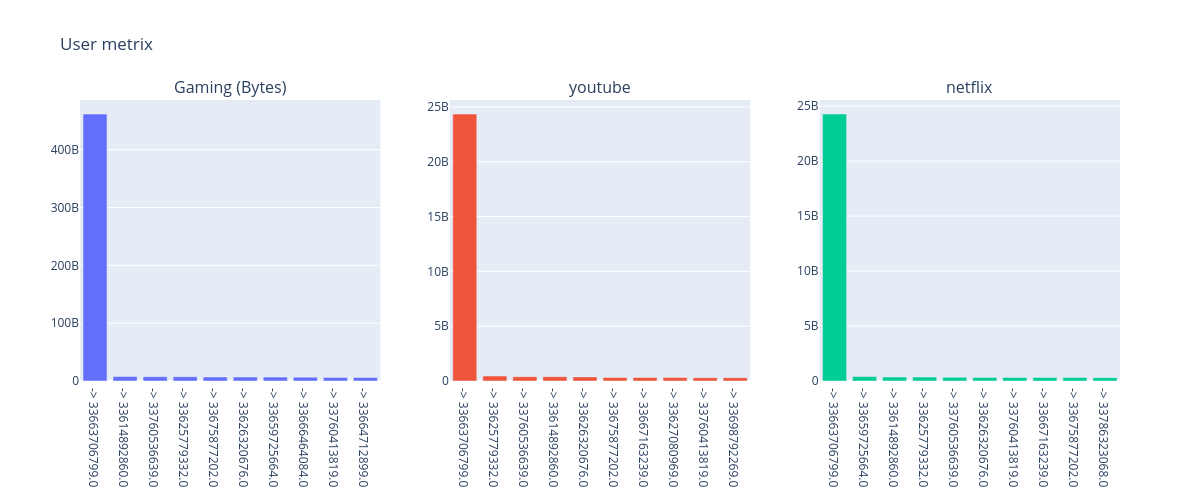

In [44]:
# top 10 data usage for each application
gaming = app_df.nlargest(10, "Gaming (Bytes)")['Gaming (Bytes)']
youtube = app_df.nlargest(10, "Youtube (Bytes)")['Youtube (Bytes)']
netflix = app_df.nlargest(10, "Netflix (Bytes)")['Netflix (Bytes)']
google = app_df.nlargest(10, "Google (Bytes)")['Google (Bytes)']
email = app_df.nlargest(10, "Email (Bytes)")['Email (Bytes)']
social_media = app_df.nlargest(10, "Social Media (Bytes)")['Social Media (Bytes)']
other = app_df.nlargest(10, "Other (Bytes)")['Other (Bytes)']


plot_mult_hist([gaming, youtube, netflix], 1,
          3, "User metrix", ["Gaming (Bytes)", "youtube", "netflix"])

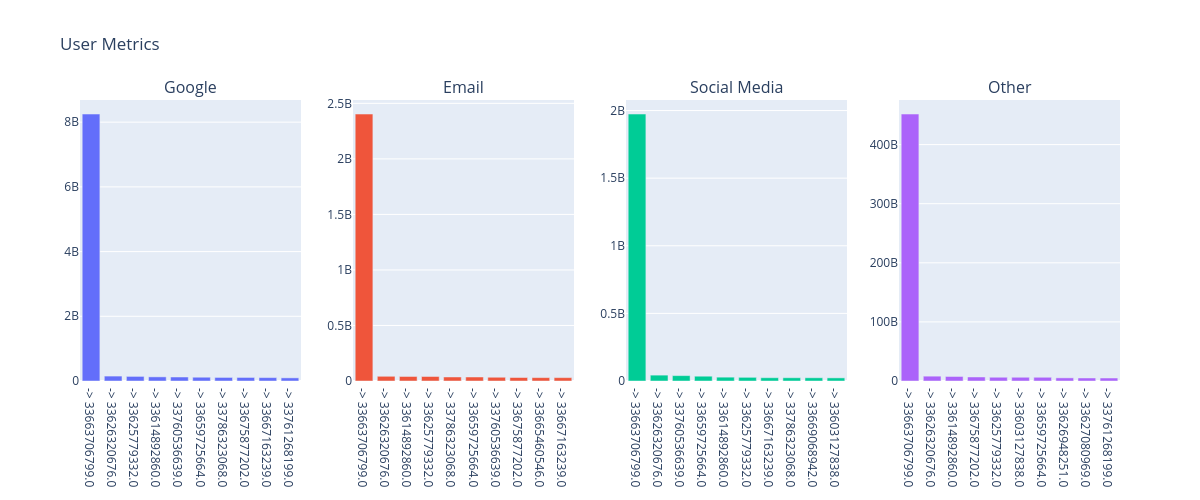

In [45]:
plot_mult_hist([google, email, social_media, other], 1,
          4, "User Metrics", [ "Google", "Email", "Social Media", "Other"])

In [46]:
# top most used applications
top_3 = app_df.sum()

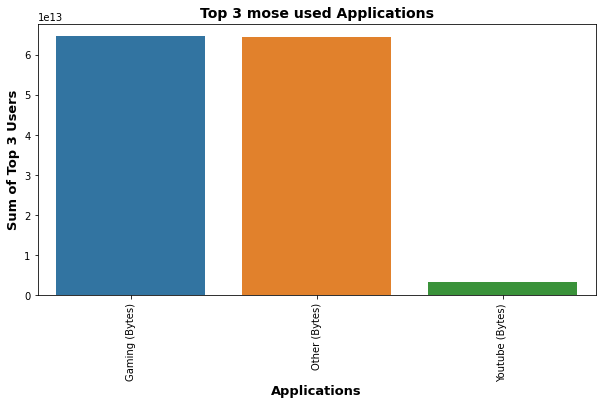

In [47]:
plot_bar_columns(top_3.nlargest(3), "Top 3 mose used Applications", "Applications", "Sum of Top 3 Users")

In [48]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user_engagement)
pd.DataFrame(scaled_array).head(5)

,0,1,2,3
0,-0.420120,-0.120240,-0.103987,0.107641
1,-0.420120,-0.120240,0.118685,-0.317516
2,-0.420120,-0.120240,-0.040996,-0.058883
3,-0.420120,-0.120240,-0.334708,-0.161160
4,2.380315,0.177556,-0.378800,0.448506


In [49]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2,3
0,-0.909533,-0.260313,-0.225125,0.233035
1,-0.759646,-0.217414,0.214601,-0.574121
2,-0.948697,-0.271522,-0.092575,-0.132968
3,-0.732490,-0.209642,-0.583571,-0.280987
4,0.968370,0.072234,-0.154105,0.182463


In [50]:
# Distortion- average of the euclidean squared distance from the centroid of the respective clusters. 
# Inertia - sum of squared distances of samples to their closest cluster centre.

def choose_kmeans(df: pd.DataFrame, num: int):
  distortions = []
  inertias = []
  K = range(1, num)
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    distortions.append(sum(
        np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeans.inertia_)

  return (distortions, inertias)

In [51]:
distortions, inertias = choose_kmeans(data_normalized, 15)

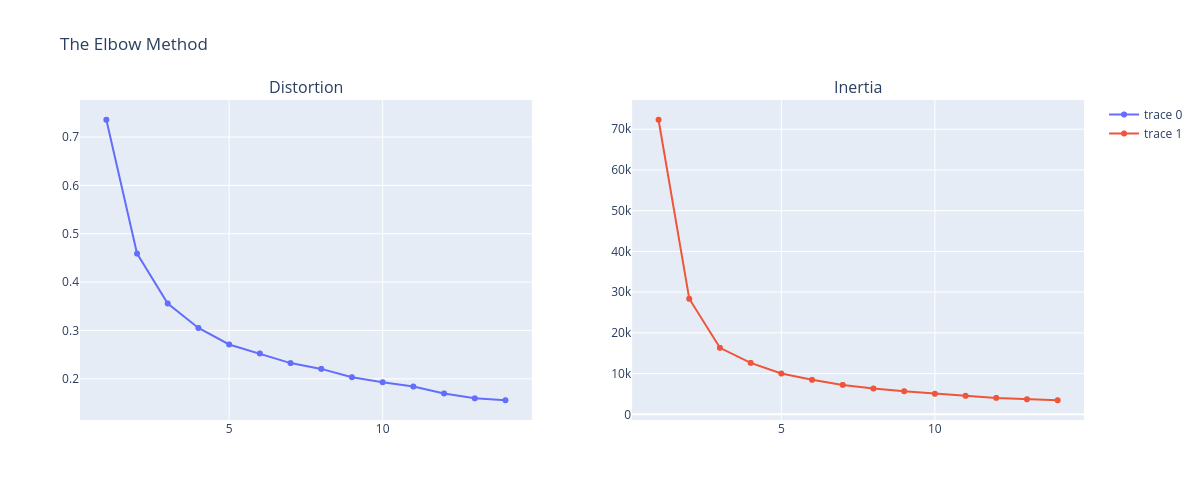

In [52]:
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Distortion", "Inertia")
)
fig.add_trace(go.Scatter(x=np.array(range(1, 15)), y=distortions), row=1, col=1)
fig.add_trace(go.Scatter(x=np.array(range(1, 15)), y=inertias), row=1, col=2)
fig.update_layout(title_text="The Elbow Method")
# fig.show(config=config)
Image(pio.to_image(fig, format='png', width=1200))

In [53]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
user_engagement["Cluster"]= kmeans.labels_
user_engagement

,Cluster,Session Frequency,Duration,Total Data Usage
User Id,,,,
3.360100e+10,3,1,116720.0,8.786906e+08
3.360100e+10,0,1,181230.0,1.568596e+08
3.360100e+10,0,1,134969.0,5.959665e+08
3.360101e+10,0,1,49878.0,4.223207e+08
3.360101e+10,1,2,37104.0,1.457411e+09
...,...,...,...,...
3.379000e+10,3,1,8810.0,7.146416e+08
3.379000e+10,0,1,140988.0,4.803073e+08
3.197021e+12,2,1,877385.0,2.321240e+08


In [54]:
# save the model
with open("../models/user_engagement.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [55]:
# save the dataset
user_engagement.to_csv('../data/user_engagement.csv')